In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

def polarization_correlation_potential(r,r_A,alpha_A,R_ff):

    return -(alpha_A)/(2*np.abs(r-r_A)**4)*(1-np.exp( -np.abs(r-r_A)**6/(R_ff)**6))

def derivative_polarization_correlation_potential(r,r_A,alpha_A,R_ff):

    return 2*alpha_A*((1)/np.abs(r-r_A)**6)*(1-np.exp( -np.abs(r-r_A)**6/(R_ff)**6))-(1)*((3*alpha_A)/((R_ff)**6))*(1-np.exp( -np.abs(r-r_A)**6/(R_ff)**6))

def parabola(x,a,b,c):
    return a*x**2 + b*x + c


distance = np.arange(0.1,15,0.1)
potential = polarization_correlation_potential(distance, 5.0, 37.740,2.686)
potential_2 = polarization_correlation_potential(distance, 10.0, 37.740,2.686)

derivative = derivative_polarization_correlation_potential(distance, 5.0, 37.740,2.686)
derivative_2 = derivative_polarization_correlation_potential(distance, 10.0, 37.740,2.686)



total_potential = [i+j for i,j in zip(potential, potential_2)]    
total_derivative = [i+j for i,j in zip(derivative, derivative_2)]    

der = np.diff(total_potential)/np.diff(distance)
dis2 = (distance[:-1]+distance[1:])/2

/tmp/ipykernel_11599/1728373832.py:7: RuntimeWarning: divide by zero encountered in true_divide
  return -(alpha_A)/(2*np.abs(r-r_A)**4)*(1-np.exp( -np.abs(r-r_A)**6/(R_ff)**6))
/tmp/ipykernel_11599/1728373832.py:7: RuntimeWarning: invalid value encountered in multiply
  return -(alpha_A)/(2*np.abs(r-r_A)**4)*(1-np.exp( -np.abs(r-r_A)**6/(R_ff)**6))
/tmp/ipykernel_11599/1728373832.py:11: RuntimeWarning: divide by zero encountered in true_divide
  return 2*alpha_A*((1)/np.abs(r-r_A)**6)*(1-np.exp( -np.abs(r-r_A)**6/(R_ff)**6))-(1)*((3*alpha_A)/((R_ff)**6))*(1-np.exp( -np.abs(r-r_A)**6/(R_ff)**6))
/tmp/ipykernel_11599/1728373832.py:11: RuntimeWarning: invalid value encountered in multiply
  return 2*alpha_A*((1)/np.abs(r-r_A)**6)*(1-np.exp( -np.abs(r-r_A)**6/(R_ff)**6))-(1)*((3*alpha_A)/((R_ff)**6))*(1-np.exp( -np.abs(r-r_A)**6/(R_ff)**6))


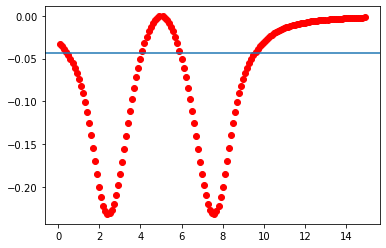

In [2]:
plt.figure()
plt.scatter(distance,potential, color ="red")

#plt.scatter(distance,potential_2, color = "blue")
#plt.plot(distance,total_potential, "green")
plt.axhline(y = -0.043)
plt.show()

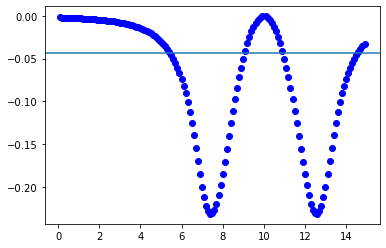

In [3]:
plt.figure()
#plt.scatter(distance,potential, color ="red")
plt.scatter(distance,potential_2, color = "blue")
#plt.plot(distance,total_potential, "green")
plt.axhline(y = -0.043)
plt.show()

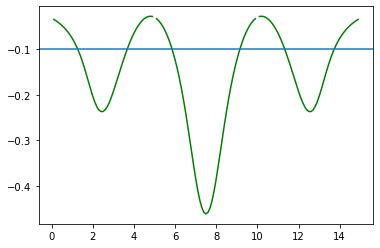

In [4]:
plt.figure()
#plt.scatter(distance,potential, color ="red")
#plt.scatter(distance,potential_2, color = "blue")
plt.plot(distance,total_potential, "green")
plt.axhline(y = -0.1)
plt.show()

In [5]:
peaks, _ = find_peaks(der)
peak_values = [der[i] for i in peaks]
peaks_dists = [dis2[i] for i in peaks]
print(peaks)
print(peak_values)
print(peaks_dists)

[ 31  81 131]
[0.14462079335011327, 0.306359729918096, 0.15832621985467837]
[3.25, 8.25, 13.25]


In [6]:
neg_peaks, _ = find_peaks(-np.array(der))
neg_peak_values = [der[i] for i in neg_peaks]
neg_peaks_dists = [dis2[i] for i in neg_peaks]
print(neg_peaks)
print(neg_peak_values)
print(neg_peaks_dists)

[ 16  66 116]
[-0.1583262198546785, -0.3063597299180959, -0.144620793350112]
[1.7500000000000002, 6.75, 11.75]


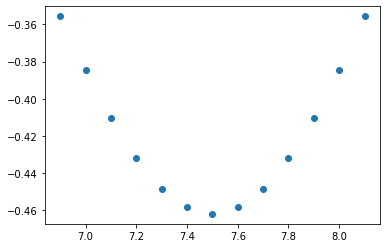

In [7]:
plt.figure()
plt.scatter(distance[68:81], total_potential[68:81])
plt.show()

In [8]:

coefficients_deepest_well = np.polyfit(distance[68:81], total_potential[68:81],2)
coefficients_one_well = np.polyfit(distance[17:31], total_potential[17:31],2)

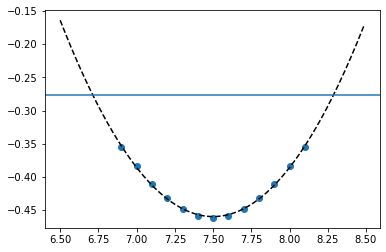

In [16]:
plt.figure()
plt.scatter(distance[68:81], total_potential[68:81])
plt.plot(np.arange(6.5,8.5,0.01), parabola(np.arange(6.5,8.5,0.01),*coefficients_deepest_well), color="black", linestyle="dashed")
plt.axhline(y=-0.27601)
plt.show()

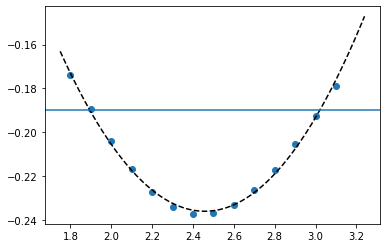

In [18]:
plt.figure()
plt.scatter(distance[17:31], total_potential[17:31])
plt.plot(np.arange(1.75,3.25,0.01), parabola(np.arange(1.75,3.25,0.01),*coefficients_one_well), color="black", linestyle="dashed")
plt.axhline(y=-0.19)

#plt.plot(np.arange(1.75,3.25,0.01), parabola(np.arange(1.75,3.25,0.01),*coefficients_deepest_well), color="black", linestyle="dashed")
plt.show()

In [11]:
print(coefficients_deepest_well)
print(coefficients_one_well)

[ 0.29590445 -4.43856679 16.18481873]
[ 0.14543565 -0.71498636  0.64276439]


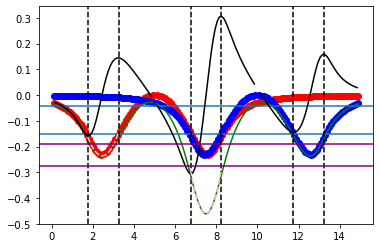

In [21]:
plt.figure()
plt.scatter(distance,potential, color ="red")
plt.scatter(distance,potential_2, color = "blue")
plt.plot(distance,total_potential, "green")
plt.axhline(y = -0.043)
plt.axhline(y = -0.15)

plt.plot(dis2,der, "black")
plt.axvline(x=3.25, color = "black", linestyle = "dashed")
plt.axvline(x=8.25, color = "black", linestyle = "dashed")
plt.axvline(x=13.25, color = "black", linestyle = "dashed")

plt.axvline(x=1.75, color = "black", linestyle = "dashed")
plt.axvline(x=6.75, color = "black", linestyle = "dashed")
plt.axvline(x=11.75, color = "black", linestyle = "dashed")
plt.plot(np.arange(1.75,3.25,0.01), parabola(np.arange(1.75,3.25,0.01),*coefficients_one_well), color="pink", linestyle="dashed")
plt.plot(np.arange(6.75,8.25,0.01), parabola(np.arange(6.75,8.25,0.01),*coefficients_deepest_well), color="pink", linestyle="dashed")
plt.axhline(y=-0.27601, color = "purple")
plt.axhline(y=-0.19, color = "purple")

plt.show()